In [3]:
#In this notebook we will analyze gene expression in the developing human brain.
#We will be using data obtained from the BRAINSPAN measurements of human brains. These were obtained at https://www.brainspan.org/rnaseq/search/index.html
#The purpose of the analysis is to identify which genes within the lipid metabolism pathways are most informative about brain development and aging
#The lipid metabolism pathway was chosen because over half of the dry weight of the human brain is made of lipid.
#Therefore, it can be reasonably assumed that lipid metabolism is very tightly controlled in the brain, and that changes in lipid content and lipid type during development and aging are highly influenced by these genes.
#In the analysis below I tried several dimensionality reduction techniques like principal component analysis(PCA) and TSNE in order to understand which genes were most important for defining subgroups out of the 524 patients.
#Also, I used a variety of clustering techniques to see which patients would cluster together(that is resemble each other more than patients of other clusters).
#As shown in the analysis below APOE is the gene most strongly associated with the overall trajectory of development and aging.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import scipy.stats as sci
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import re
#importing libraries

In [18]:
gene_df=pd.read_csv("brainlipo.csv")
gene_df=gene_df.T
gene_df.head()
# brain lipo gene expression per patient

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
row_num,3,193,258,280,366,428,737,786,827,850,...,17155,17222,17711,17855,17972,18095,20468,20589,23417,51768
gene_id,8736,8968,36740,11149,29616,41027,35022,9334,34939,58847,...,55647,344,55857,10386,8662,90807,58453,35224,3906,3665
ensembl_gene_id,ENSG00000000419,ENSG00000007541,ENSG00000010282,ENSG00000011009,ENSG00000015520,ENSG00000023041,ENSG00000054392,ENSG00000057663,ENSG00000060642,ENSG00000062282,...,ENSG00000188818,ENSG00000189058,ENSG00000197121,ENSG00000197548,ENSG00000197858,ENSG00000198168,ENSG00000204160,ENSG00000204444,ENSG00000213398,ENSG00000259207
gene_symbol,DPM1,PIGQ,HHATL,LYPLA2,NPC1L1,ZDHHC6,HHAT,ATG5,PIGV,DGAT2,...,ZDHHC11,APOD,PGAP1,ATG7,GPAA1,SVIP,ZDHHC18,APOM,LCAT,ITGB3
entrez_id,8813,9091,57467,11313,29881,64429,55733,9474,55650,84649,...,79844,347,80055,10533,8733,258010,84243,55937,3931,3690


In [53]:

samples=gene_df.values
samples=np.delete(samples,[range(0,5)],axis=0)
print(samples)
#removing gene id's to have pure data

[[1.6803420e+01 1.3584455e+01 1.1185755e+01 ... 7.2939080e+00
  9.1137840e+00 1.1002961e+01]
 [1.8619210e+00 1.1647930e+00 1.1209490e+00 ... 9.0730700e-01
  9.2290300e-01 1.2046490e+00]
 [9.3020480e+00 6.5885450e+00 6.2823180e+00 ... 1.2321699e+01
  5.2664490e+00 1.2765412e+01]
 ...
 [9.8518800e-01 1.4714670e+00 6.5902600e-01 ... 1.8950470e+00
  2.7315240e+00 1.4831880e+00]
 [6.1302300e-01 4.0508600e-01 2.2463400e-01 ... 1.5103000e-02
  3.4608600e-01 1.4298900e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [20]:
scaler = StandardScaler()
samples_scaled = scaler.fit_transform(samples)

samples_normalized = normalize(samples_scaled)

samples_normalized = pd.DataFrame(samples_normalized)
pca = PCA(n_components = 2)
samples_principal = pca.fit_transform(samples_normalized)
samples_principal = pd.DataFrame(samples_principal)
samples_principal.columns = ['P1', 'P2']
#creating pc1 and pc2 for PCA(principal components analysis) with patients

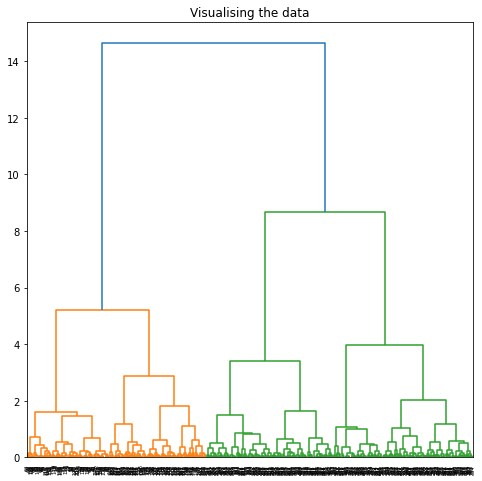

In [21]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(samples_principal, method ='ward')))
#dendrogram to show how the clusters are made

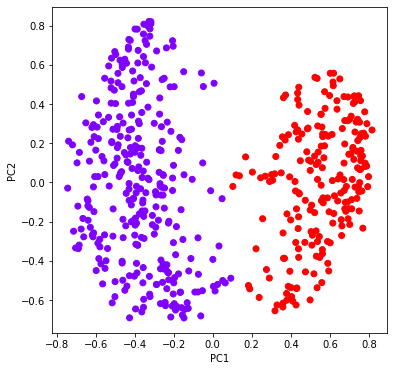

In [22]:
ac2 = AgglomerativeClustering(n_clusters = 2)


plt.figure(figsize =(6, 6))

plt.scatter(samples_principal['P1'], samples_principal['P2'], c = ac2.fit_predict(samples_principal), cmap ='rainbow')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()




#Agglomeratively clustering plot for PCA
#There appears to be two large clusters of patients separated on the PC1 axis, each cluster is also spread across PC2

In [23]:

samples

array([[34.373239, 4.957886, 0.0, ..., 4.981144, 0.985188, 0.613023],
       [20.765661, 4.885296, 0.0, ..., 4.648099, 1.471467, 0.405086],
       [18.734947, 4.508666, 0.0, ..., 4.193755, 0.659026, 0.224634],
       ...,
       [28.731717, 3.973337, 11.950902, ..., 1.134062, 1.895047,
        0.015103],
       [16.679597, 4.636462, 34.038134, ..., 1.60321, 2.731524, 0.346086],
       [28.866042, 5.522242, 12.859782, ..., 1.134294, 1.483188,
        0.142989]], dtype=object)

In [24]:
gene_df=pd.read_csv("brainlipo.csv",index_col=3)
gene_df=gene_df.drop(['row_num', 'gene_id', 'ensembl_gene_id', 'entrez_id'], axis=1).T

x=[]

for names in range(524):
    x.append(gene_df.T.columns[names])
   
samples_principal['samples']=x
print(samples_principal)
#Shown below are the PC1 and PC2 coordinates for each sample in the database

           P1        P2            samples
0    0.427427  0.258012      1-8 pcw-M-Ocx
1    0.578419  0.244221  2-8 pcw-M-M1C-S1C
2    0.676222  0.196289      3-8 pcw-M-AMY
3    0.559547  0.282829      4-8 pcw-M-MGE
4    0.663916  0.275090      5-8 pcw-M-STC
..        ...       ...                ...
519 -0.322379  0.746469   520-40 yrs-F-IPC
520 -0.293297 -0.046964   521-40 yrs-F-M1C
521 -0.201138  0.087330   522-40 yrs-F-HIP
522 -0.422757  0.145130   523-40 yrs-F-STR
523 -0.381346  0.224940   524-40 yrs-F-S1C

[524 rows x 3 columns]


In [25]:
pd.DataFrame(samples).head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,34.373239,4.957886,0.0,15.007184,0.006853,16.80342,1.861921,9.302048,1.948372,0.259309,...,0.074568,3.987598,18.528562,7.395518,17.528421,4.706358,9.40438,4.981144,0.985188,0.613023
1,20.765661,4.885296,0.0,8.533285,0.0,13.584455,1.164793,6.588545,1.63055,0.175087,...,0.357056,3.782146,18.162287,6.270376,13.631538,3.092537,9.32076,4.648099,1.471467,0.405086
2,18.734947,4.508666,0.0,10.774588,0.0,11.185755,1.120949,6.282318,1.335926,0.576523,...,0.152814,5.219452,17.84818,6.394491,20.18493,1.453678,7.921595,4.193755,0.659026,0.224634
3,22.366394,4.872717,0.0,7.240709,0.0,11.722672,1.6625,7.177213,1.594737,0.308998,...,0.087677,0.95369,13.053936,7.512032,18.166466,2.364709,8.39351,4.935286,1.201308,0.512886
4,19.228431,4.3998,0.0,9.406447,0.021421,11.752288,1.256894,6.606826,1.390376,0.228871,...,0.162762,13.649302,19.430527,6.623395,17.413062,2.42849,9.572363,3.407114,1.096786,0.521908


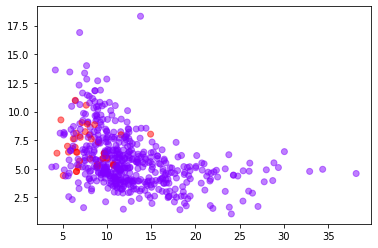

In [26]:
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(samples)

plt.scatter(samples[:,0],samples[:,1], c=cluster.labels_, cmap='rainbow',alpha=.5)
plt.show()
#Creating cluster plot using euclidean distance with patients. Shown in red is one cluster, the other is in purple.

In [27]:
gene_df=pd.read_csv("brainlipo.csv",index_col=3)
gene_df=gene_df.drop(['row_num', 'gene_id', 'ensembl_gene_id', 'entrez_id'], axis=1).T


In [28]:
print(cluster.labels_)
#Shown is cluster membership per sample. 0 denotes one cluster, 1 denotes the other.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
gene_df['cluster']=cluster.labels_
print(gene_df)

gene_symbol             DPM1      PIGQ      HHATL     LYPLA2    NPC1L1  \
1-8 pcw-M-Ocx      34.373239  4.957886   0.000000  15.007184  0.006853   
2-8 pcw-M-M1C-S1C  20.765661  4.885296   0.000000   8.533285  0.000000   
3-8 pcw-M-AMY      18.734947  4.508666   0.000000  10.774588  0.000000   
4-8 pcw-M-MGE      22.366394  4.872717   0.000000   7.240709  0.000000   
5-8 pcw-M-STC      19.228431  4.399800   0.000000   9.406447  0.021421   
...                      ...       ...        ...        ...       ...   
520-40 yrs-F-IPC   21.631293  3.935226   5.567528   2.672844  0.014480   
521-40 yrs-F-M1C   28.006120  4.913720  11.462198   5.030284  0.004712   
522-40 yrs-F-HIP   28.731717  3.973337  11.950902   5.580393  0.000000   
523-40 yrs-F-STR   16.679597  4.636462  34.038134   6.922569  0.065043   
524-40 yrs-F-S1C   28.866042  5.522242  12.859782   5.182835  0.000000   

gene_symbol           ZDHHC6      HHAT       ATG5      PIGV     DGAT2  ...  \
1-8 pcw-M-Ocx      16.803420  1.8

In [30]:
gene_df[gene_df['cluster']==0].mean(axis = 0).sort_values()
#first cluster ehich

gene_symbol
cluster      0.000000
APOBEC1      0.001400
APOC3        0.007058
LEP          0.007743
NPC1L1       0.015527
              ...    
APOD        57.256557
CTSD        64.198029
GLUL        91.802758
APOE       166.632705
CLIP3      173.275611
Length: 104, dtype: float64

In [31]:
gene_df[gene_df['cluster']==1].mean(axis = 0).sort_values()
#second cluster

gene_symbol
APOBEC1       0.000000
LEP           0.002967
NPC1L1        0.012315
APOC3         0.014747
PCSK9         0.015348
              ...     
CTSD         97.511662
CLIP3       102.553826
APOC1       213.079884
GLUL        474.001969
APOE       1462.353420
Length: 104, dtype: float64

In [32]:
sum(cluster.labels_)

35

In [33]:
gene_df=gene_df.T
nasamples = gene_df.values
print(nasamples)
#data for NMF

[[3.4373239e+01 2.0765661e+01 1.8734947e+01 ... 2.8731717e+01
  1.6679597e+01 2.8866042e+01]
 [4.9578860e+00 4.8852960e+00 4.5086660e+00 ... 3.9733370e+00
  4.6364620e+00 5.5222420e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1950902e+01
  3.4038134e+01 1.2859782e+01]
 ...
 [9.8518800e-01 1.4714670e+00 6.5902600e-01 ... 1.8950470e+00
  2.7315240e+00 1.4831880e+00]
 [6.1302300e-01 4.0508600e-01 2.2463400e-01 ... 1.5103000e-02
  3.4608600e-01 1.4298900e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [34]:
model = NMF( n_components=2,init='random', random_state=0)
W = model.fit_transform(nasamples)
H = model.components_
#creating H matrix and W matrix using Non negativee matrix factorization(NMF) as another way of identifying the most important genes associated with variation of the rest of the genes in the lipid pathway.

In [35]:

for x in range(524):
    print(gene_df.columns[x],H[[0,1],x].tolist())
    
    
#H matrix data    

1-8 pcw-M-Ocx [0.23393827981593684, 1.3247266530829922]
2-8 pcw-M-M1C-S1C [0.0899874814749146, 1.703012061301279]
3-8 pcw-M-AMY [0.13329391575866478, 1.6469959991226206]
4-8 pcw-M-MGE [0.10220060157485279, 1.6090280797114946]
5-8 pcw-M-STC [0.37515284185836173, 1.9576638257349919]
6-8 pcw-M-URL [0.3209574956791913, 1.819814464868005]
7-8 pcw-M-CGE [0.05468891771444238, 1.859303303179906]
8-8 pcw-M-DTH [0.09300710600195683, 1.4286335792852556]
9-8 pcw-M-MFC [0.1710244373344091, 1.1675303229611635]
10-8 pcw-M-DFC [0.22556571178297632, 1.0696698677988918]
11-8 pcw-M-OFC [0.5636577655239907, 1.015822393674217]
12-8 pcw-M-LGE [0.02648481785976487, 1.6672017924317442]
13-8 pcw-M-ITC [0.07013445522936503, 1.6994560257237739]
14-8 pcw-M-HIP [0.340091472474436, 1.4066064363377633]
15-8 pcw-M-VFC [0.1600244717156293, 1.3045693137117054]
16-8 pcw-M-PCx [0.12116983830649304, 1.6805522234549704]
17-9 pcw-M-DFC [0.004588848965687028, 2.265388420546954]
18-9 pcw-M-MFC [0.002373189436816344, 2.3183625

In [36]:
H2=[]
for x in range(524):
    t=(gene_df.columns[x],H[0,x],H[1,x])
    
    
    H2.append(t)
    

H2.sort( key=lambda x:x[1], reverse=True)

print(H2)
#H matrix data sorted by first number/row

[('227-37 pcw-M-MD', 19.833001835635066, 0.0), ('301-2 yrs-F-MD', 19.83182640373421, 0.0), ('307-2 yrs-F-V1C', 17.08940949084122, 0.0), ('302-2 yrs-F-DFC', 16.854296010797583, 0.2554649444750517), ('300-2 yrs-F-ITC', 16.109515659269594, 0.0), ('322-3 yrs-M-M1C', 15.778654982891316, 1.887544391601403), ('306-2 yrs-F-OFC', 15.575035156492731, 0.0), ('297-2 yrs-F-VFC', 15.406501064608696, 0.3491937983651456), ('325-3 yrs-M-IPC', 14.800159024862793, 1.5909049343125083), ('279-10 mos-M-MD', 14.26896005740799, 3.0987107895664447), ('308-2 yrs-F-STC', 14.22120409043953, 0.15429780926857845), ('324-3 yrs-M-STC', 13.914280044074195, 2.2047559301309207), ('317-3 yrs-F-A1C', 13.470894114812834, 2.8505046860654835), ('312-3 yrs-F-ITC', 13.313192827161089, 3.0152183555086105), ('323-3 yrs-M-S1C', 12.958508475441574, 1.580800794682385), ('298-2 yrs-F-IPC', 12.898728592726739, 0.02432517366929064), ('216-25 pcw-F-A1C', 12.848844347104913, 1.8550680384090843), ('333-3 yrs-M-ITC', 12.84883176357522, 1.

In [37]:
H2.sort( key=lambda x:x[2], reverse=True)
print(H2)
#H matrix data sorted by second number/row

[('366-8 yrs-M-STC', 0.9205016023208974, 6.425847195179013), ('360-8 yrs-M-VFC', 1.1704190943374586, 5.758733024312719), ('359-8 yrs-M-A1C', 1.8057944708863047, 5.668143392143572), ('362-8 yrs-M-AMY', 5.49434255298888, 5.441102284619515), ('278-10 mos-M-ITC', 5.6552179122118815, 5.297905114808565), ('367-8 yrs-M-ITC', 1.1645195160890602, 5.272374662089178), ('476-30 yrs-F-VFC', 0.5248092075137445, 5.196921913952432), ('364-8 yrs-M-IPC', 1.8195056946811696, 5.117229551802817), ('465-30 yrs-F-OFC', 1.0968214984101143, 5.068346959937414), ('464-30 yrs-F-MFC', 0.6935748810271498, 5.056266573189942), ('386-13 yrs-F-ITC', 1.4115901625995766, 5.046564816751828), ('471-30 yrs-F-A1C', 0.653507676096387, 5.038583115608679), ('276-10 mos-M-MFC', 3.5228731937579596, 4.9837457133187915), ('462-30 yrs-F-ITC', 0.6693020925392841, 4.867704932645749), ('274-10 mos-M-DFC', 3.5276102054173863, 4.862610237205566), ('280-10 mos-M-V1C', 4.0091755135422416, 4.857566522992451), ('473-30 yrs-F-DFC', 0.55972256

In [38]:
print(W.shape)

(104, 2)


In [39]:
print(nasamples.shape)

(104, 524)


In [40]:
print(H)

[[0.23393828 0.08998748 0.13329392 ... 2.03278809 3.42766566 0.77942266]
 [1.32472665 1.70301206 1.646996   ... 1.72687737 2.43327807 2.99806592]]


In [41]:
H_df=pd.DataFrame(H, columns=gene_df.columns).T
x=[]
for value in H.T:
    if value[0] > value[1]:
        x.append(0)
    else:
        x.append(1)
H_df['C']=x

H_df['0_1_diff'] =H_df[0]-H_df[1]
H_df=H_df.sort_values(by='0_1_diff', ascending=False)
print(H_df)
C0s=H_df.loc[H_df['0_1_diff']>0].index
C1s=H_df.loc[H_df['0_1_diff']<=0].index
#analysis of the samples 

                          0         1  C   0_1_diff
227-37 pcw-M-MD   19.833002  0.000000  0  19.833002
301-2 yrs-F-MD    19.831826  0.000000  0  19.831826
307-2 yrs-F-V1C   17.089409  0.000000  0  17.089409
302-2 yrs-F-DFC   16.854296  0.255465  0  16.598831
300-2 yrs-F-ITC   16.109516  0.000000  0  16.109516
...                     ...       ... ..        ...
466-30 yrs-F-IPC   0.383355  4.778427  1  -4.395072
475-30 yrs-F-M1C   0.270882  4.802565  1  -4.531684
360-8 yrs-M-VFC    1.170419  5.758733  1  -4.588314
476-30 yrs-F-VFC   0.524809  5.196922  1  -4.672113
366-8 yrs-M-STC    0.920502  6.425847  1  -5.505346

[524 rows x 4 columns]


In [42]:
mE_c0 =gene_df[C0s].mean(axis=1)
mE_c1 =gene_df[C1s].mean(axis=1)

diffE_c= pd.DataFrame(mE_c0-mE_c1)
diffE_c.columns=['MeanExpDiff']
diffE_c['MeanExpC0']=mE_c0
diffE_c['MeanExpC1']=mE_c1
diffE_c=diffE_c.sort_values(by='MeanExpDiff', ascending=False)
print(diffE_c)
#mean expression of the clusters from NMF
#This higlights that APOE is the most highly expressed in cluster 0

             MeanExpDiff   MeanExpC0   MeanExpC1
gene_symbol                                     
APOE          764.908407  847.296726   82.388319
GLUL          250.334772  311.770744   61.435972
APOC1         126.599105  140.040941   13.441836
APOD           59.670142  106.204856   46.534714
DBI            49.494307   77.438196   27.943889
...                  ...         ...         ...
UGCG           -4.098279    4.963045    9.061323
PPM1A          -4.263765    6.624692   10.888457
NMT1           -4.606481   14.511484   19.117965
PGAP1          -5.192110    2.896099    8.088209
CLIP3         -45.398997  133.289629  178.688626

[104 rows x 3 columns]


In [43]:
gene_df.head()

,1-8 pcw-M-Ocx,2-8 pcw-M-M1C-S1C,3-8 pcw-M-AMY,4-8 pcw-M-MGE,5-8 pcw-M-STC,6-8 pcw-M-URL,7-8 pcw-M-CGE,8-8 pcw-M-DTH,9-8 pcw-M-MFC,10-8 pcw-M-DFC,...,515-40 yrs-F-A1C,516-40 yrs-F-CBC,517-40 yrs-F-V1C,518-40 yrs-F-OFC,519-40 yrs-F-STC,520-40 yrs-F-IPC,521-40 yrs-F-M1C,522-40 yrs-F-HIP,523-40 yrs-F-STR,524-40 yrs-F-S1C
gene_symbol,,,,,,,,,,,,,,,,,,,,,
DPM1,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
PIGQ,4.957886,4.885296,4.508666,4.872717,4.399800,7.042405,4.829338,4.586870,4.774339,4.589862,...,6.230731,6.157183,5.215355,4.454139,4.668274,3.935226,4.913720,3.973337,4.636462,5.522242
HHATL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027197,0.000000,...,13.111074,7.552178,13.642510,6.351730,10.227655,5.567528,11.462198,11.950902,34.038134,12.859782
LYPLA2,15.007184,8.533285,10.774588,7.240709,9.406447,10.717289,6.880991,10.411558,9.946529,12.507440,...,5.535053,4.747595,5.172533,3.277875,3.872781,2.672844,5.030284,5.580393,6.922569,5.182835
NPC1L1,0.006853,0.000000,0.000000,0.000000,0.021421,0.015853,0.000000,0.000000,0.000000,0.009306,...,0.000000,0.000000,0.028658,0.000000,0.012779,0.014480,0.004712,0.000000,0.065043,0.000000


In [44]:
np.random.seed(1)
tsne_data=gene_df.T
print(tsne_data)
print(H_df.index)
tsne_data=tsne_data.loc[H_df.index]

tsne_shownData= TSNE(n_components=2).fit_transform(tsne_data)
print(tsne_shownData)
xs,ys =[_[0] for _ in tsne_shownData], [_[1] for _ in tsne_shownData]
#Analyzing data through TSNE

gene_symbol             DPM1      PIGQ      HHATL     LYPLA2    NPC1L1  \
1-8 pcw-M-Ocx      34.373239  4.957886   0.000000  15.007184  0.006853   
2-8 pcw-M-M1C-S1C  20.765661  4.885296   0.000000   8.533285  0.000000   
3-8 pcw-M-AMY      18.734947  4.508666   0.000000  10.774588  0.000000   
4-8 pcw-M-MGE      22.366394  4.872717   0.000000   7.240709  0.000000   
5-8 pcw-M-STC      19.228431  4.399800   0.000000   9.406447  0.021421   
...                      ...       ...        ...        ...       ...   
520-40 yrs-F-IPC   21.631293  3.935226   5.567528   2.672844  0.014480   
521-40 yrs-F-M1C   28.006120  4.913720  11.462198   5.030284  0.004712   
522-40 yrs-F-HIP   28.731717  3.973337  11.950902   5.580393  0.000000   
523-40 yrs-F-STR   16.679597  4.636462  34.038134   6.922569  0.065043   
524-40 yrs-F-S1C   28.866042  5.522242  12.859782   5.182835  0.000000   

gene_symbol           ZDHHC6      HHAT       ATG5      PIGV     DGAT2  ...  \
1-8 pcw-M-Ocx      16.803420  1.8

In [45]:
print(H_df)

                          0         1  C   0_1_diff
227-37 pcw-M-MD   19.833002  0.000000  0  19.833002
301-2 yrs-F-MD    19.831826  0.000000  0  19.831826
307-2 yrs-F-V1C   17.089409  0.000000  0  17.089409
302-2 yrs-F-DFC   16.854296  0.255465  0  16.598831
300-2 yrs-F-ITC   16.109516  0.000000  0  16.109516
...                     ...       ... ..        ...
466-30 yrs-F-IPC   0.383355  4.778427  1  -4.395072
475-30 yrs-F-M1C   0.270882  4.802565  1  -4.531684
360-8 yrs-M-VFC    1.170419  5.758733  1  -4.588314
476-30 yrs-F-VFC   0.524809  5.196922  1  -4.672113
366-8 yrs-M-STC    0.920502  6.425847  1  -5.505346

[524 rows x 4 columns]


In [46]:
print(len(xs))

524


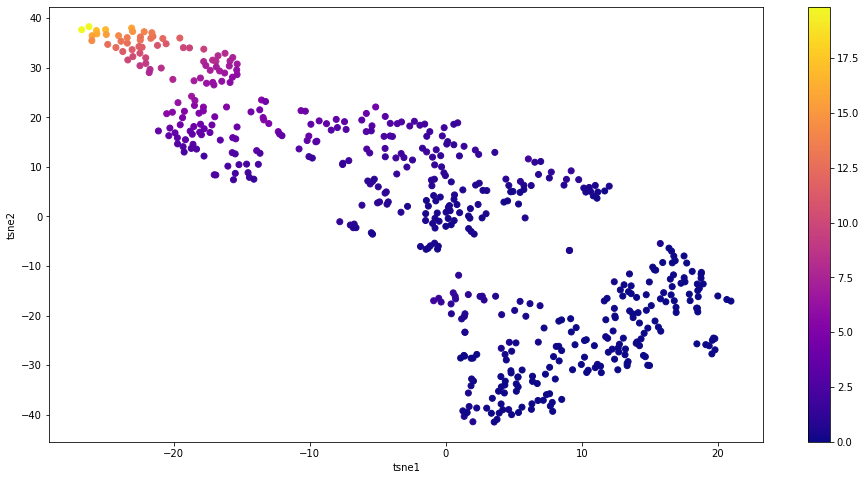

In [47]:
plt.figure(figsize=(16,8))
plt.scatter(xs,ys, c= H_df[0], cmap='plasma')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
bar=plt.colorbar()
#scatter plot of TSNE data
#This shows that cluster 0 is relatively small.

Text(0, 0.5, 'APOE Expression')

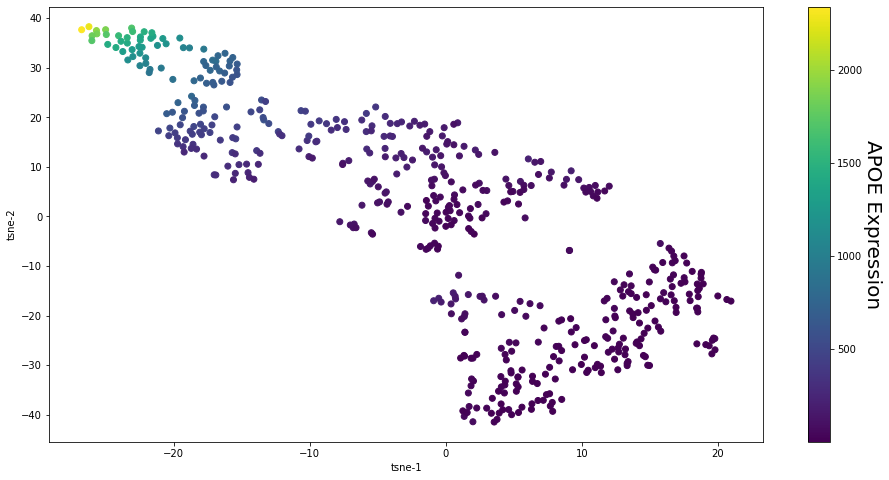

In [48]:
plt.figure(figsize=(16,8))

plt.scatter(xs, ys, c=tsne_data['APOE'])
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')
cbar = plt.colorbar()
cbar.ax.set_ylabel('APOE Expression', rotation=270, size=20, labelpad=20)
#Scatter plot of APOE expression with TSNE data
#This shows that cluster 0 is charcterized by APOE

In [49]:
ageRegex=re.compile('.*-(\d+) (.+)-.+-')
C0ages =[]
for sample in C0s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units= matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C0ages.append(age)
    
C1ages=[]
for sample in C1s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units=matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C1ages.append(age)
    
print('Mean C0 age',np.mean(C0ages))
print('Mean C1 age',np.mean(C1ages))

print('Median C0 age',np.median(C0ages))
print('Median C1 age',np.median(C1ages))
#Translating samples ages into ages in weeks

Mean C0 age 382.12820512820514
Mean C1 age 422.12530712530713
Median C0 age 156.0
Median C1 age -14.0


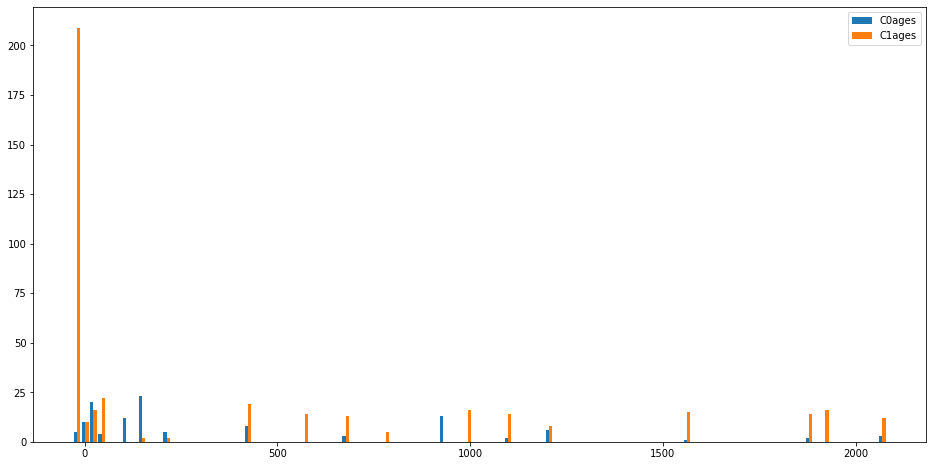

In [50]:
plt.figure(figsize=(16,8))
plt.hist([C0ages,C1ages],100,label=['C0ages', 'C1ages'])
plt.legend(loc= 'upper right')
#Historgram of Cluster 0 and cluster 1's ages

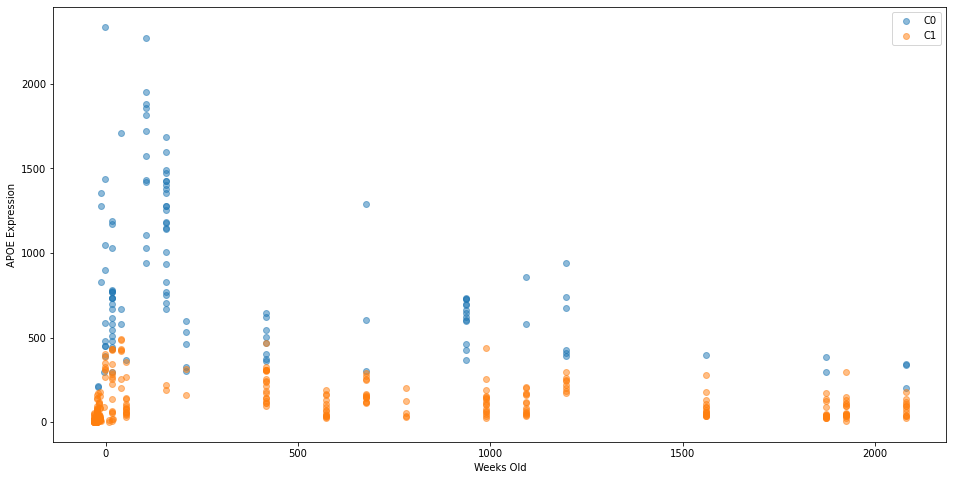

In [51]:
plt.figure(figsize=(16,8))
plt.scatter(C0ages, gene_df.loc['APOE'][C0s], label='C0',alpha=.5)
plt.scatter(C1ages, gene_df.loc['APOE'][C1s], label='C1',alpha=.5)
plt.ylabel('APOE Expression')
plt.xlabel('Weeks Old')
plt.legend(loc='upper right')
#Scatter plot of each samples cluster membership(by color), age and APOE expression.
#This shows again that cluster 0 is described by APOE expression.
#This also shows that APOE is mostly expressed and highly expressed in fetal development and early childhood.

In [52]:
#APOE expression and age
#In summary the analysis done so far suggests that there is a subgroup of patients that have particularly elevated APOE expressions during the fetal period and first 150 weeks of life.
#This immediately raises the question of why APOE is highly expressed in these few individuals.
#Even if it is important for brain development that does not explain why just a few individuals show such high levels of expression.
#A hint might be provided by the publication of the study by Oriá et al. Med Hypotheses. 2007, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3993898/
#In that study they found that children living in socially economically deprived environments had very APOE expressions in their blood.
#They speculated that this APOE elevation was protective of brain development in the context of infections and other stresses.
#Indeed a study done by Gale et al. J Allergy Clin Immunol. 2014, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4125509/ supports the role of APOE in mounting a vigorous innate response to infection.
#This still doesn't answer the question of why cluster 0 had a higher expression of APOE.
#It might be as in the aforementioned hypothesis, in the articles above that, that members of cluster 0 were affected by infection or other inflammatory conditions.
#Next steps would include finding out more about the individuals from whom the samples were obtained.
#Looking for a history of infection would be one task.